In [ ]:
# STEP 4: TEST DATA QUALITY
# Explore Result Quality Part III
# This notebook visualizes the statistics obtained in the prior step (Result Quality Part II.). 

In [1]:
# >>> Preparation
# Import statistics
import pandas

print("Importing name statistics... ")
names_stats = pandas.read_csv("../../_data/names_score_min_stats.csv")

# Setting index & accessing cells: https://pythonhow.com/accessing-dataframe-columns-rows-and-cells/
#names_stats = names_stats.set_index("min_score", drop = False)
print("Stats imported. They look like this: {}".format(names_stats[:3]))

Importing name statistics... 
Stats imported. They look like this:    Unnamed: 0  score_min  pubs_mean  pubs_mean_f  pubs_mean_m  pubs_median  \
0           0          0   5.789820     4.179795     6.114435          2.0   
1           1          1   5.850721     4.071149     6.167649          2.0   
2           2          2   5.965752     4.059755     6.278961          2.0   

   pubs_median_f  pubs_median_m  pubs_total   pubs_f    pubs_m  publs_f_part  \
0            1.0            2.0    13353745  1617564  11736181      0.121132   
1            1.0            2.0    12555887  1320750  11235137      0.105190   
2            1.0            2.0    11407221  1095598  10311623      0.096044   

   authors_total  authors_f  authors_m  authors_f_part  
0        2306418     386996    1919422        0.167791  
1        2146041     324417    1821624        0.151170  
2        1912118     269868    1642250        0.141136  


In [2]:
# For our population of 2306418 names we need at least a sample of 16.522 names to analyze for
# a confidence level of 99%  with error tolerance of 4%
# (According to Surveymonkey: https://www.surveymonkey.de/mp/sample-size-calculator/)
# So we can only chose thresholds that guarantee this minimum amount of names.

names_stats_valid = names_stats[names_stats['authors_total'] >= 16522]

In [3]:
min_threshold = names_stats_valid['score_min'].min()
max_threshold = names_stats_valid['score_min'].max()

In [4]:
print("The minimum valid threshold is {}, the maximum is {}".format(min_threshold, max_threshold))

The minimum valid threshold is 0, the maximum is 15


In [5]:
# >>> Visualization
import matplotlib.pyplot as plt

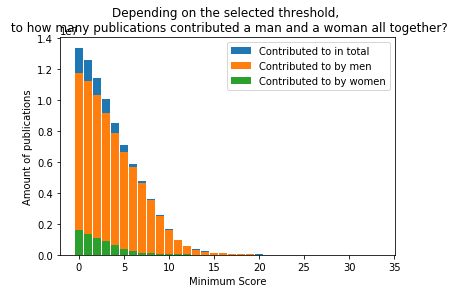

In [6]:
# Visualize how many publications have been contributed to: in total, by men, by women
plt.bar(names_stats['score_min'], names_stats['pubs_total'], label="Contributed to in total")
plt.bar(names_stats['score_min'], names_stats['pubs_m'], label="Contributed to by men")
plt.bar(names_stats['score_min'], names_stats['pubs_f'], label="Contributed to by women")

plt.xlabel("Minimum Score")
plt.ylabel("Amount of publications")
plt.title("Depending on the selected threshold, \n to how many publications contributed a man and a woman all together?")
plt.legend()

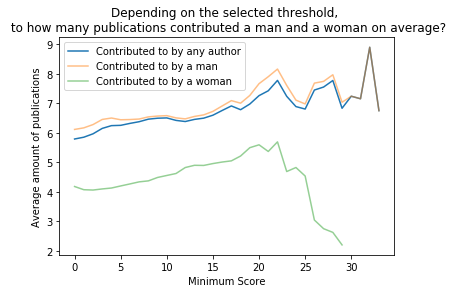

In [7]:
# Amount of contributions: Mean

plt.plot(names_stats['score_min'], names_stats['pubs_mean'], label="Contributed to by any author")
plt.plot(names_stats['score_min'], names_stats['pubs_mean_m'], alpha=0.5, label="Contributed to by a man")
plt.plot(names_stats['score_min'], names_stats['pubs_mean_f'], alpha=0.5, label="Contributed to by a woman")

plt.xlabel("Minimum Score")
plt.ylabel("Average amount of publications")
plt.title("Depending on the selected threshold, \n to how many publications contributed a man and a woman on average?")
plt.legend()

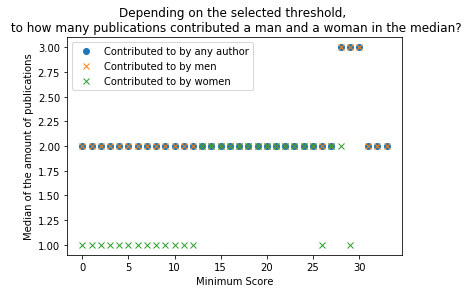

In [8]:
# Amount of contributions: Median

plt.plot(names_stats['score_min'], names_stats['pubs_median'], "o", label="Contributed to by any author")
plt.plot(names_stats['score_min'], names_stats['pubs_median_m'], "x", label="Contributed to by men")
plt.plot(names_stats['score_min'], names_stats['pubs_median_f'], "x", label="Contributed to by women")

plt.xlabel("Minimum Score")
plt.ylabel("Median of the amount of publications")
plt.title("Depending on the selected threshold, \n to how many publications contributed a man and a woman in the median?")
plt.legend()

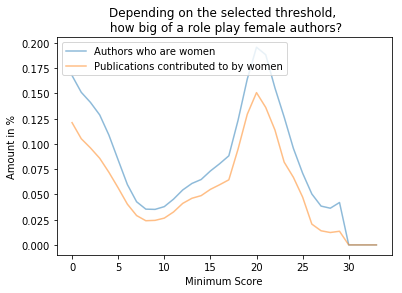

In [9]:
# Amount of contributions / Authors: Percentage of women

plt.plot(names_stats['score_min'], names_stats['authors_f_part'], alpha=0.5, label="Authors who are women")
plt.plot(names_stats['score_min'], names_stats['publs_f_part'], alpha=0.5, label="Publications contributed to by women")

plt.xlabel("Minimum Score")
plt.ylabel("Amount in %")
plt.title("Depending on the selected threshold, \n how big of a role play female authors?")
plt.legend(loc="upper left")

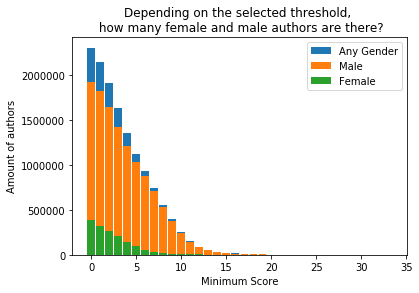

In [12]:
# Amount of authors: Total
plt.bar(names_stats['score_min'], names_stats['authors_total'], label="Any Gender")
plt.bar(names_stats['score_min'], names_stats['authors_m'], label="Male")
plt.bar(names_stats['score_min'], names_stats['authors_f'], label="Female")

plt.xlabel("Minimum Score")
plt.ylabel("Amount of authors")
plt.title("Depending on the selected threshold, \n how many female and male authors are there?")
plt.legend()

In [ ]:
# >>> Interpretation:
# Depending on the chosen threshold of data to exclude from the analysis, our results change, 
# considering the ratio men-women. 

# Considering our calculated minimum valid threshold and maximum valid threshold,
# let's assume the score minimum needs to be at least 0 and at most 15
# The lowest measured amount of female authors is 3,5%,
# The highest measured amount of female authors is 16,8%.
# So the amount of female authors lays between 3,5% and 16,8%